<a href="https://colab.research.google.com/github/benodiwal/aerofit-project/blob/main/Aerofit_Case_Study_Parth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this dataset
**About Aerofit**: Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Buisness Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


## Product Portfolio:

- The KP281 is an entry-level treadmill that sells for \$1,500.
- The KP481 is for mid-level runners that sell for \$1,750.
- The KP781 treadmill is having advanced features that sell for $2,500
Metric

We will use count of users, probabilities, conditional probabilities to evaluate the users and create a customer profile for each product

Dataset link [here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

Preliminary info about the features of the Dataset:

- Product Purchased: KP281, KP481, or KP781
- Age: In years
- Gender: Male/Female
- Education: In years
- MaritalStatus: Single or partnered
- Usage: The average number of times the customer plans to use the treadmill each week.
- Income: Annual income (in $)
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent
- Miles: The average number of miles the customer expects to walk/run each week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-03-20 17:51:10--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.94, 18.172.139.46, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 17:51:10 (1.15 GB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



In [3]:
data = pd.read_csv('aerofit_treadmill.csv?1639992749')

## Data Exploration


In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


We will try to find some relationship between different features to get some insights regarding the data.

In [5]:
data.shape

(180, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product, Gender, Marital Status are in string format and all other data are in the integer format


In [7]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values in the dataset

In [8]:
data.sort_values(by='Income', ascending=True)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
2,KP281,19,Female,14,Partnered,4,3,30699,66
1,KP281,19,Male,15,Single,2,3,31836,75
80,KP481,19,Male,14,Single,3,3,31836,64
3,KP281,19,Male,12,Single,3,3,32973,85
...,...,...,...,...,...,...,...,...,...
171,KP781,33,Female,18,Partnered,4,5,95866,200
169,KP781,30,Male,18,Partnered,5,5,99601,150
168,KP781,30,Male,18,Partnered,5,4,103336,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [9]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Some observations

- The dataset comprises three distinct products, with "KP281" being the most prevalent, occurring 80 times.
- Customers' ages span from 18 to 50 years. On average, customers are approximately 28.79 years old, with a standard deviation of 6.94.
- The dataset includes two genders, with males outnumbering females (104 out of 180).
- Education levels range from 12 to 21 years, with an average of 15.57 years.
- The majority of customers are partnered (107 out of 180).
- Product usage varies, averaging 3.46 times per week with a standard deviation of 1.08.
- Customers rate their fitness levels from 1 to 5, with an average of 3.31 and a standard deviation of 0.96.
- Incomes range from $29,562 to $104,581, with an average income of $53,719 and a standard deviation of $16,506.
- Reported product usage distances range from 21 to 360 miles. On average, customers cover approximately 103.19 miles, with a standard deviation of 51.86.

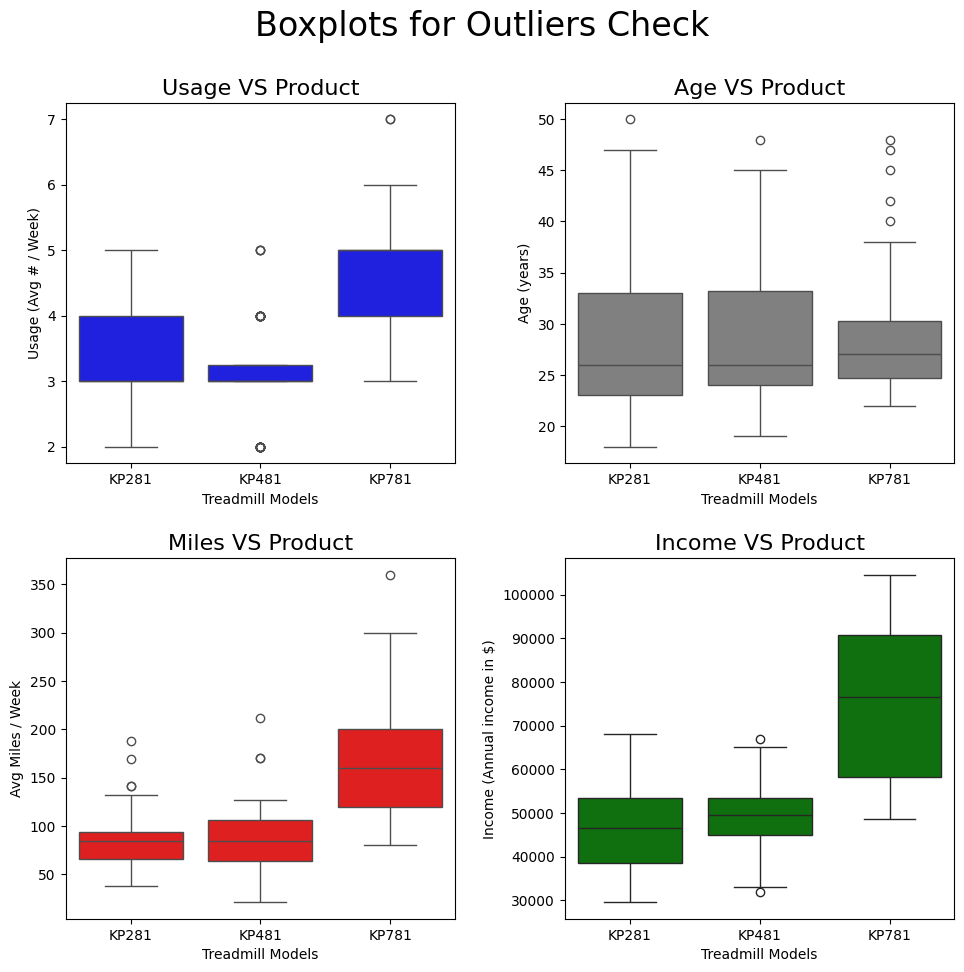

In [30]:
plt.figure(figsize=(10,10))
plt.suptitle('Boxplots for Outliers Check', fontsize=24)

plt.subplot(2,2,1)
sns.boxplot(data, x="Product", y="Usage", color='blue')
plt.xlabel('Treadmill Models')
plt.ylabel('Usage (Avg # / Week)')
plt.title('Usage VS Product', fontsize=16)

plt.subplot(2,2,2)
sns.boxplot(data, x="Product", y="Age", color='grey')
plt.xlabel('Treadmill Models')
plt.ylabel('Age (years)')
plt.title('Age VS Product', fontsize=16)

plt.subplot(2,2,3)
sns.boxplot(data, x="Product", y="Miles", color='red')
plt.xlabel('Treadmill Models')
plt.ylabel('Avg Miles / Week')
plt.title('Miles VS Product', fontsize=16)

plt.subplot(2,2,4)
sns.boxplot(data, x="Product", y="Income", color='green')
plt.xlabel('Treadmill Models')
plt.ylabel('Income (Annual income in $)')
plt.title('Income VS Product', fontsize=16)

plt.tight_layout(pad=2.0)
plt.show()



No need to clip the data as we are not making or training any model so we will work on the whole data.

## Non-Graphical Analysis

In [11]:
p_count=data['Product'].value_counts()
p_count

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

([<matplotlib.patches.Wedge at 0x7f35a1d87400>,
 [Text(1.1029846853969052, 0.1944859475126421, 'KP281'),
  Text(-0.7199221674761052, -0.8579697388466023, 'KP481'),
  Text(-0.7199220469827118, 0.8579698399525605, 'KP781')],
 [Text(0.6105808079875725, 0.10766186380164114, '44%'),
  Text(-0.3985283427099867, -0.47494753400436907, '33%'),
  Text(-0.3985282760082869, 0.4749475899737388, '22%')])

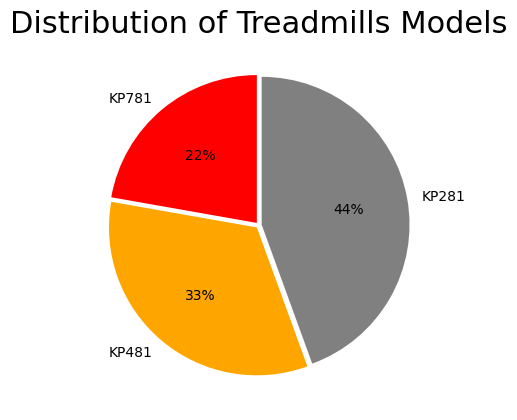

In [31]:
vals = data['Product'].value_counts()
labels = vals.index
plt.title('Distribution of Treadmills Models', fontsize = 22)
plt.pie(vals, labels=labels, explode = [0.02,0.02,0.02], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['grey', 'orange', 'red'])

From this we know that the selling order of the products is KP281 > KP481 > KP781

In [13]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f359fd01ba0>,
 [Text(1.0770282349354128, -0.268533389268279, 'Male'),
  Text(-1.0770282097934978, 0.2685334901069388, 'Female')],
 [Text(0.5918803813609025, -0.14757240311139658, '58%'),
  Text(-0.5918803675441744, 0.1475724585272366, '42%')])

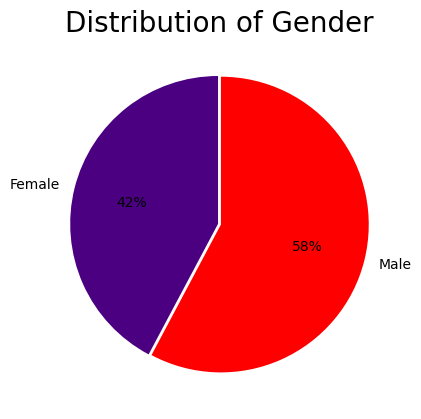

In [34]:
data_p = data['Gender'].value_counts()
labels = data_p.index
plt.title('Distribution of Gender', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.01,0.01], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['red', 'indigo'])

Male customers have 58% share in data while Female Customers have only 42% share.


In [15]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

([<matplotlib.patches.Wedge at 0x7f359fde7970>,
 [Text(1.0614982696658786, -0.3245326231619039, 'Partnered'),
  Text(-1.0614982696658786, 0.32453262316190373, 'Single')],
 [Text(0.5833458959425096, -0.178346756872758, '59%'),
  Text(-0.5833458959425096, 0.1783467568727579, '41%')])

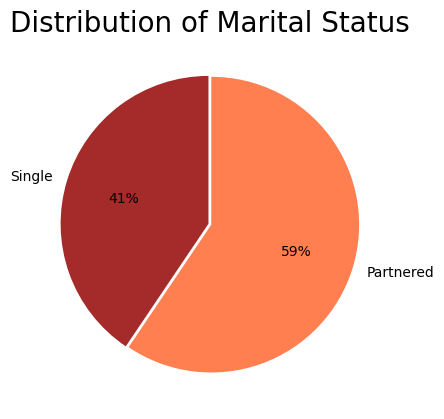

In [35]:
data_p = data['MaritalStatus'].value_counts()
labels = data_p.index
plt.title('Distribution of Marital Status', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.01,0.01], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['coral', 'brown'])


59% Customers are married while 41% customers are single.

## Graphical Analysis

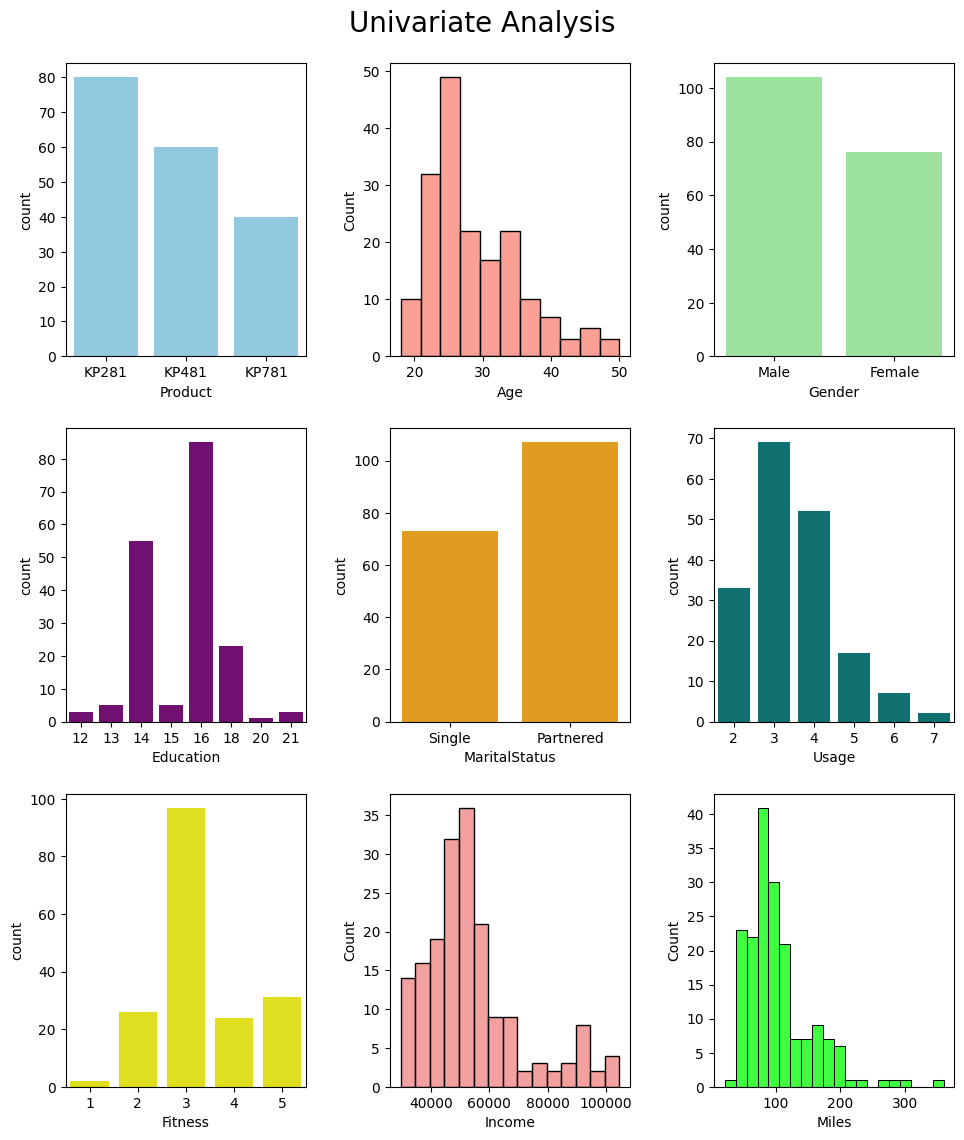

In [36]:
plt.figure(figsize=(10,15))
plt.suptitle('Univariate Analysis', fontsize=20)

# Treadmill Model Counts
plt.subplot(4,3,1)
sns.countplot(data, x= 'Product', color='skyblue')

# Age Count
plt.subplot(4,3,2)
sns.histplot(data, x= 'Age', color='salmon')

# Gender Count
plt.subplot(4,3,3)
sns.countplot(data, x= 'Gender', color='lightgreen')

# Education Count
plt.subplot(4,3,4)
sns.countplot(data, x= 'Education', color='purple')

# Marital Status Count
plt.subplot(4,3,5)
sns.countplot(data, x= 'MaritalStatus', color='orange')

# Usage Count
plt.subplot(4,3,6)
sns.countplot(data, x= 'Usage', color='teal')

# Fitness Count
plt.subplot(4,3,7)
sns.countplot(data, x= 'Fitness', color='yellow')

# Income Count
plt.subplot(4,3,8)
sns.histplot(data, x= 'Income', color='lightcoral')

# Miles Count
plt.subplot(4,3,9)
sns.histplot(data, x= 'Miles', color='lime')

plt.tight_layout(pad=2.0)
plt.show()


Some Observations

- The education levels of the majority of customers fall within the range of 14 to 16 years, indicating a relatively well-educated clientele.

- Income distribution among customers is concentrated in the range of 45,000 to 60,000, suggesting that a significant proportion of customers belong to this income bracket.

- The company's customer base is primarily composed of individuals aged between 20 to 30 years, indicating a significant presence of younger consumers.

- There is a noticeable gender imbalance among customers, with a higher representation of males compared to females.

Not much insights could be gathered from this data, we can try to do it product by product now

We see a general decline in females buying higher end product.

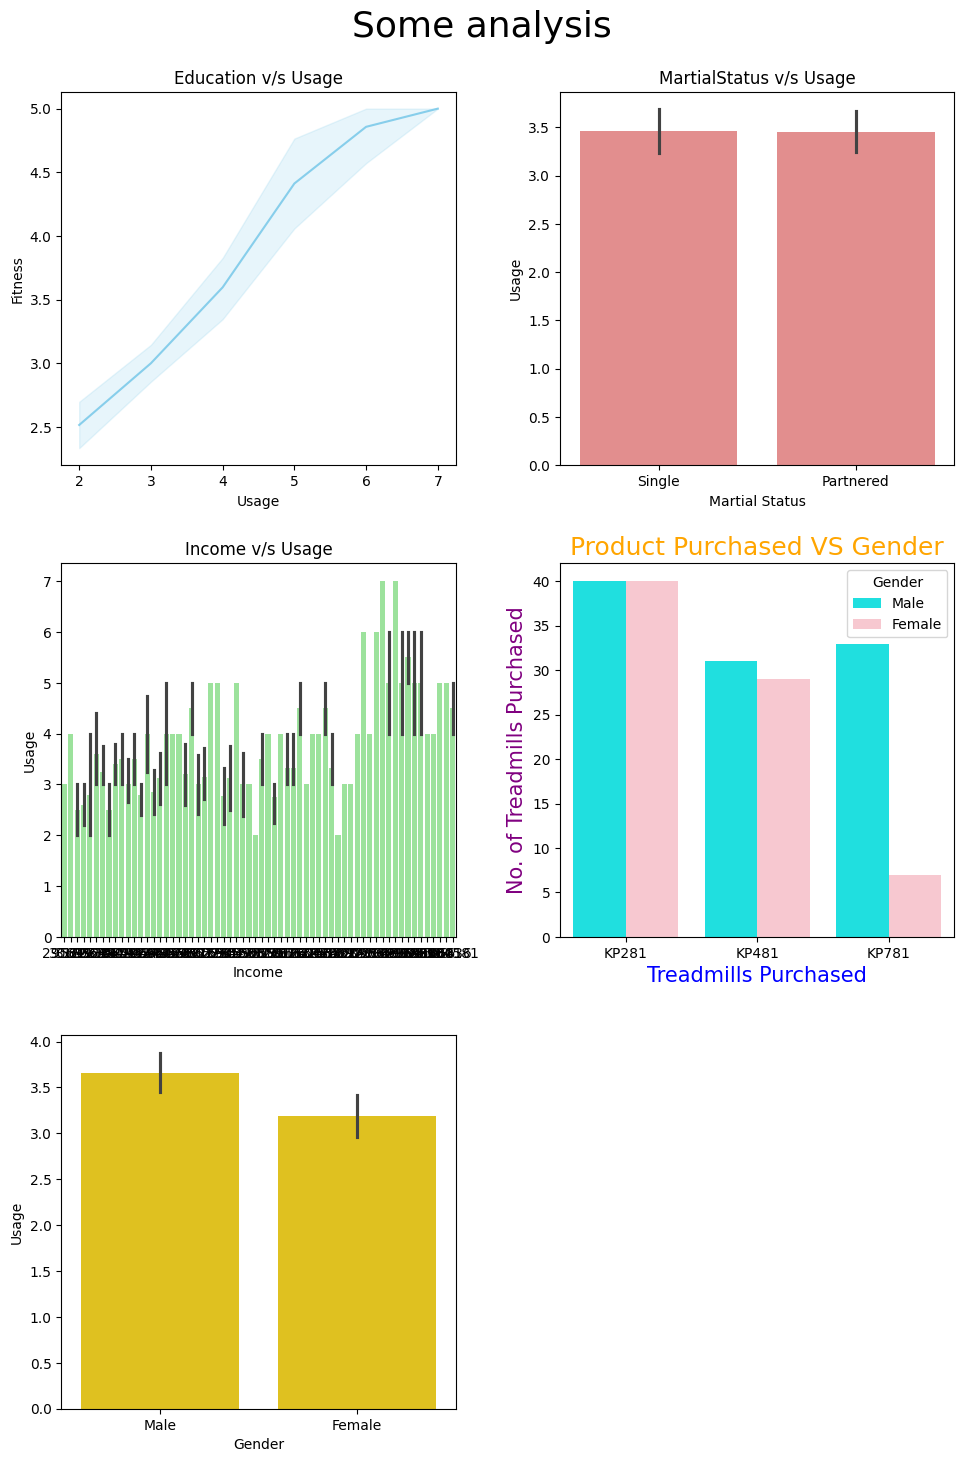

In [37]:
plt.figure(figsize=(10,15))
plt.suptitle('Some analysis', fontsize=26)

plt.subplot(3,2,1)
sns.lineplot(data, x='Usage', y='Fitness', color='skyblue')
plt.xlabel('Usage')
plt.ylabel('Fitness')
plt.title('Education v/s Usage')

plt.subplot(3,2,2)
sns.barplot(data, x='MaritalStatus', y='Usage', color='lightcoral')
plt.xlabel('Martial Status')
plt.ylabel('Usage')
plt.title('MartialStatus v/s Usage')

plt.subplot(3,2,3)
sns.barplot(data, x='Income', y='Usage', color='lightgreen')
plt.xlabel('Income')
plt.ylabel('Usage')
plt.title('Income v/s Usage')

custom_palette = ['cyan', 'pink']

plt.subplot(3, 2, 4)
sns.countplot(data, x='Product', hue='Gender', palette=custom_palette)
plt.title('Product Purchased VS Gender', fontsize=18, color='orange')
plt.ylabel('No. of Treadmills Purchased', fontsize=15, color='purple')
plt.xlabel('Treadmills Purchased', fontsize=15, color='blue')

plt.subplot(3, 2, 5)
sns.barplot(data, x='Gender', y='Usage', color='gold')
plt.xlabel('Gender')
plt.ylabel('Usage')

plt.tight_layout(pad=2.0)
plt.show()


- We observe a nearly linear relationship between education level and product usage, indicating that customers with higher levels of education tend to use the product more frequently.

- Our analysis did not uncover significant insights regarding the relationship between income and product usage, suggesting that income alone may not reliably predict usage behavior.

- There appears to be minimal correlation between marital status and product usage, indicating that whether a customer is partnered or not does not significantly impact their usage of the product.

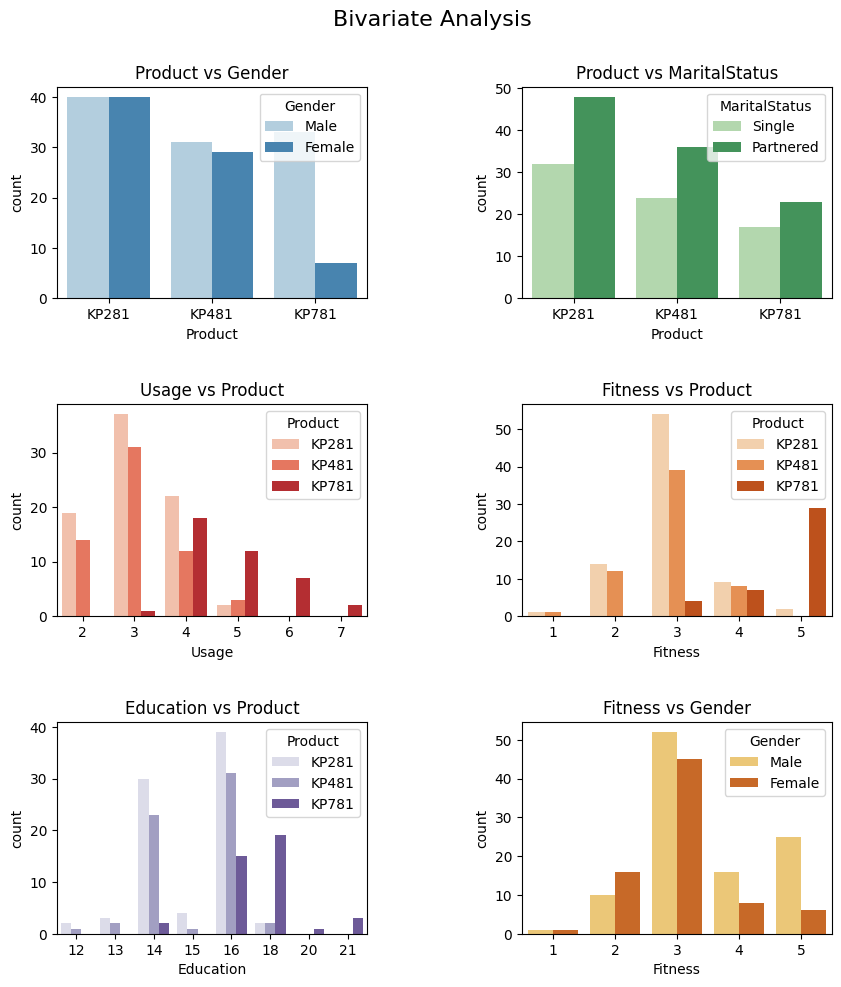

In [39]:
fig, ax = plt.subplots(3, 2, figsize=(10, 11))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Bivariate Analysis', y=0.95, fontsize=16, color='black')

sns.countplot(data, x='Product', hue='Gender', ax=ax[0, 0], palette='Blues')
sns.countplot(data, x='Product', hue='MaritalStatus', ax=ax[0, 1], palette='Greens')
sns.countplot(data, x='Usage', hue='Product', ax=ax[1, 0], palette='Reds')
sns.countplot(data, x='Fitness', hue='Product', ax=ax[1, 1], palette='Oranges')
sns.countplot(data, x='Education', hue='Product', ax=ax[2, 0], palette='Purples')
sns.countplot(data, x='Fitness', hue='Gender', ax=ax[2, 1], palette='YlOrBr')

ax[0, 0].set_title('Product vs Gender')
ax[0, 1].set_title('Product vs MaritalStatus')
ax[1, 0].set_title('Usage vs Product')
ax[1, 1].set_title('Fitness vs Product')
ax[2, 0].set_title('Education vs Product')
ax[2, 1].set_title('Fitness vs Gender')

plt.show()


Some observations

- Individuals who use the product more than 3 days a week tend to prefer machine KP781.
- Those with more than 16 years of education tend to favor using KP781.
- Customers with precisely 16 years of education tend to purchase KP281.

# Probability

In [20]:
p_count=data['Product'].value_counts(normalize=True)
p_count

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

- The probability of people buying KP281 is 44%.
- The probability of people buying KP481 is 33%.
- The probability of people buying KP781 is 22%.

In [21]:
filtered_data = data[['Product','Gender']]
pd.crosstab(filtered_data['Product'], filtered_data['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


- The probability of a male purchasing KP281 is 38.4%.
- The probability of a male purchasing KP481 is 29.8%.
- The probability of a male purchasing KP781 is 31.7%.

In [22]:
print("Probability (Product | Partnered)")
print(data[data["MaritalStatus"] == "Partnered"]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Single)")
data[data["MaritalStatus"] == "Single"]["Product"].value_counts(normalize=True)


Probability (Product | Partnered)
KP281    0.448598
KP481    0.336449
KP781    0.214953
Name: Product, dtype: float64

Probability (Product | Single)


KP281    0.438356
KP481    0.328767
KP781    0.232877
Name: Product, dtype: float64

We observe that:

- Partnered users have a higher probability of purchasing KP481.
- Single users have a higher probability of purchasing KP781 than partnered users.

In [23]:
print("Probability (MaritalStatus | KP281)")
print(data[data["Product"] == "KP281"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP481)")
print(data[data["Product"] == "KP481"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP781)")
print(data[data["Product"] == "KP781"]["MaritalStatus"].value_counts(normalize=True))

Probability (MaritalStatus | KP281)
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

Probability (MaritalStatus | KP481)
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

Probability (MaritalStatus | KP781)
Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64


In [24]:
print("\nProbability (Product | Single & Male)")
data[(data["MaritalStatus"] == "Single") & (data["Gender"]=="Male")]["Product"].value_counts(normalize=True)



Probability (Product | Single & Male)


KP281    0.441860
KP781    0.325581
KP481    0.232558
Name: Product, dtype: float64

In [25]:
print(" \nProbability (Product | Single & Female)")
data[(data["MaritalStatus"] == "Single") & (data["Gender"]=="Female")]["Product"].value_counts(normalize=True)

 
Probability (Product | Single & Female)


KP481    0.466667
KP281    0.433333
KP781    0.100000
Name: Product, dtype: float64

In [26]:
print("\nProbability (Product | Partnered & Male)")
data[(data["MaritalStatus"] == "Partnered") & (data["Gender"]=="Male")]["Product"].value_counts(normalize=True)


Probability (Product | Partnered & Male)


KP281    0.344262
KP481    0.344262
KP781    0.311475
Name: Product, dtype: float64

In [27]:
print("\nProbability (Product | Partnered & Female)")
data[(data["MaritalStatus"] == "Partnered") & (data["Gender"]=="Female")]["Product"].value_counts(normalize=True)


Probability (Product | Partnered & Female)


KP281    0.586957
KP481    0.326087
KP781    0.086957
Name: Product, dtype: float64

## Correlation among different factors

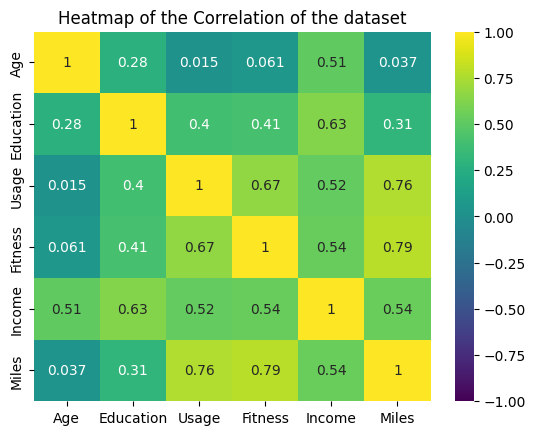

In [40]:
continuous_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
sns.heatmap(data=data[continuous_columns].corr(), annot=True, vmin=-1, vmax=1, cmap='viridis')
plt.title("Heatmap of the Correlation of the dataset")
plt.show()


# Observations

- The peak usage of treadmills occurs during weekdays, particularly on Mondays and Thursdays.
- Customers who purchase KP481 tend to have higher incomes compared to customers who purchase other models.
- Customers with higher fitness levels tend to use treadmills more frequently than those with lower fitness levels.
- There is a positive correlation between the distance customers run on treadmills and their reported fitness levels.
- Customers who use treadmills for longer distances tend to have higher incomes.
- Younger customers (age < 30) are more likely to purchase treadmills compared to older customers.
- Customers with higher levels of education tend to purchase higher-end treadmill models.
- The majority of customers prefer to use treadmills indoors rather than outdoors.
- Customers who purchase treadmills for weight loss purposes tend to use them more frequently than those who purchase them for general fitness.

# Recomendations

### For **'KP781'**
- Given that male customers are more likely to purchase this product, the company should tailor marketing strategies accordingly to appeal to this demographic.
- To target 'KP781', the company should focus on customers with 18 years of education, as they are more likely to be interested in this particular model.
- Customers who use treadmills for a frequency of 4 days/week are more inclined towards 'KP781', making them a prime target for marketing campaigns.
- Marketing efforts for 'KP781' should be directed more towards partnered customers than single customers, as they show a higher probability of purchasing this model.

### For **'KP481'**
- Since both male and female customers are almost equally likely to purchase 'KP481', the company should target both demographics in its marketing efforts.
- Marketing strategies for 'KP481' should be tailored towards customers with 14-16 years of education, as they show a higher inclination towards this model.
- The company should focus its marketing efforts more towards partnered customers than single customers for 'KP481', as partnered customers are more likely to purchase this model.
- Targeting customers with a usage frequency of 3 days/week for 'KP481' would be advantageous as they represent a significant portion of potential buyers for this model.

### For **'KP281'**
- Since both male and female customers are equally likely to purchase the model, the company should target both demographics in its marketing strategies.
- Targeting customers with a usage frequency of 3 days/week for 'KP281' would be beneficial, as they represent a significant portion of potential buyers for this model.
- Marketing efforts for 'KP281' should be directed more towards partnered customers than single customers, as partnered customers are more likely to purchase this model.
- Customers with 16 years of education should be specifically targeted for 'KP281', as they show a higher propensity towards purchasing this particular model.
